<h1 > <span style="font-size: 3em; color:DarkSlateBlue"> </span></h1>

<h1 > <span style="font-size: 3em; color:DarkSlateBlue"> 🎓 College Admissions</span></h1>
<h1 > <span style="font-size: 1em; color:Orange"> &emsp; &emsp; &emsp; &emsp; &emsp;📊 📉 Data science project</span></h1> 

*** 


<h1 > <span style="font-size: 3em; color:DarkSlateBlue"> </span></h1>

<div class="alert alert-block alert-info"> 
    
# 1.1 Scenario
> ### You are a high school student or a parent about to begin the college admission process and you decided to analyze the data to find a school that would be a good fit.
# Motivation
> ### College Admissions are a multi billion dollar a year industry.
# Data Questions
>
> ## 1) Applications vs admissions vs enrolled: WHat does this tell you about the number of students that were accepted, but went to a different school? What do you think impacted their decisions?
> ## 2) Which is more popular: SAT or ACT based off of region?
> ## 3) Does the % of ACT vs SAT scores submitted change based on the acceptance rates? Does SAT submissions increase when the school’s acceptance rate decreases?
> ## 4)  What region has the most Public schools? What region has the most private schools?
> ## 5) What can you tell about the amount of 4 year schools vs private schools?
> ## 6) What can you tell about the graduation Rates?
> ## 7) What can you tell about the % of women vs men?

## 1.2 About the dataset
> This dataset was used from kaggle and can be found here:
https://www.kaggle.com/datasets/samsonqian/college-admissions

### 1.3 Import Python libraries

In [40]:
# The fundamental package for scientific computing with Python
import numpy as np
from numpy import arange
from numpy import mean

# Pandas is a widely-used data analysis and manipulation library for Python
import pandas as pd 

# Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import MonthLocator, DateFormatter
from matplotlib.ticker import NullFormatter
import matplotlib.patches as mpatches

# Seaborn is a data visualization library based on matplotlib
import seaborn as sns

# Datetime module supplies classes to work with date and time.
import datetime as dt
# Missingno is exploratory visualization tool for  missing data
import missingno as msno

# Plotly is an interactive, open-source plotting library
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots

# Show warning messages
import warnings
# Never print matching warnings
warnings.filterwarnings('ignore')

#### 1.4 Set display

In [41]:
# Set display to show up to 200 columns in dataframe

sns.reset_orig()
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows', 50)

# Set default color palette to colorblind
plt.style.use('seaborn-colorblind')

# Set the aesthetic style of any plots 
sns.set_style('whitegrid') 
sns.color_palette("colorblind")
%config InlineBackend.figure_format='retina'

# Enable the inline plotting
%matplotlib inline
# Trick to widen the screen
from IPython.core.display import display, HTML
#Widens the code landscape 
display(HTML("<style>.container { width:95% !important; }</style>"))

### 2. Import the datasets

In [42]:
# Read a comma-separated values (csv) file from the same folder into DataFrame
df = pd.read_csv('Data/Data-Table_1.csv', header = 0)
df = (df[['Name', 'Geographic region', 'State abbreviation', 'Applicants total', 'Enrolled total', 'Percent of freshmen submitting SAT scores', 'Percent of freshmen submitting ACT scores', 'ACT Composite 25th percentile score','ACT Composite 75th percentile score','Level of institution', 'Control of institution', 'Graduation rate - Bachelor degree within 6 years, total', 'Percent of total enrollment that are women']])

## 3. Begin Exploring the Dataset
> ### Explore the data. What is the shape of the dataset?. What are the different variable types when you look at "Dtype" ? Is there any missing data? Repeating values? Outliers?

In [43]:
# Show the first 5 rows of the df_airports
display(df.head())
# Print a concise summary of a DataFrame.
display(df.info())

,Name,Geographic region,State abbreviation,Applicants total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,ACT Composite 25th percentile score,ACT Composite 75th percentile score,Level of institution,Control of institution,"Graduation rate - Bachelor degree within 6 years, total",Percent of total enrollment that are women
0,Alabama A & M University,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Alabama,6142.0,1104.0,15.0,88.0,15.0,19.0,Four or more years,Public,29.0,55.0
1,University of Alabama at Birmingham,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Alabama,5689.0,1773.0,6.0,93.0,22.0,28.0,Four or more years,Public,53.0,61.0
2,Amridge University,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,Four or more years,Private not-for-profit,67.0,58.0
3,University of Alabama in Huntsville,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Alabama,2054.0,651.0,34.0,94.0,23.0,29.0,Four or more years,Public,48.0,44.0
4,Alabama State University,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Alabama,10245.0,1479.0,18.0,87.0,15.0,19.0,Four or more years,Public,25.0,61.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 13 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Name                                                     1534 non-null   object 
 1   Geographic region                                        1534 non-null   object 
 2   State abbreviation                                       1534 non-null   object 
 3   Applicants total                                         1377 non-null   float64
 4   Enrolled total                                           1377 non-null   float64
 5   Percent of freshmen submitting SAT scores                1257 non-null   float64
 6   Percent of freshmen submitting ACT scores                1259 non-null   float64
 7   ACT Composite 25th percentile score                      1199 non-null   float64
 8   ACT Composite 75th percentil

None

# 3.2 Cleaning and manipulating the data
> ### Clean the data based on what you found in your exploration of the data. Are there any outliers, impractical and missing values, null values, etc? How can you tell?

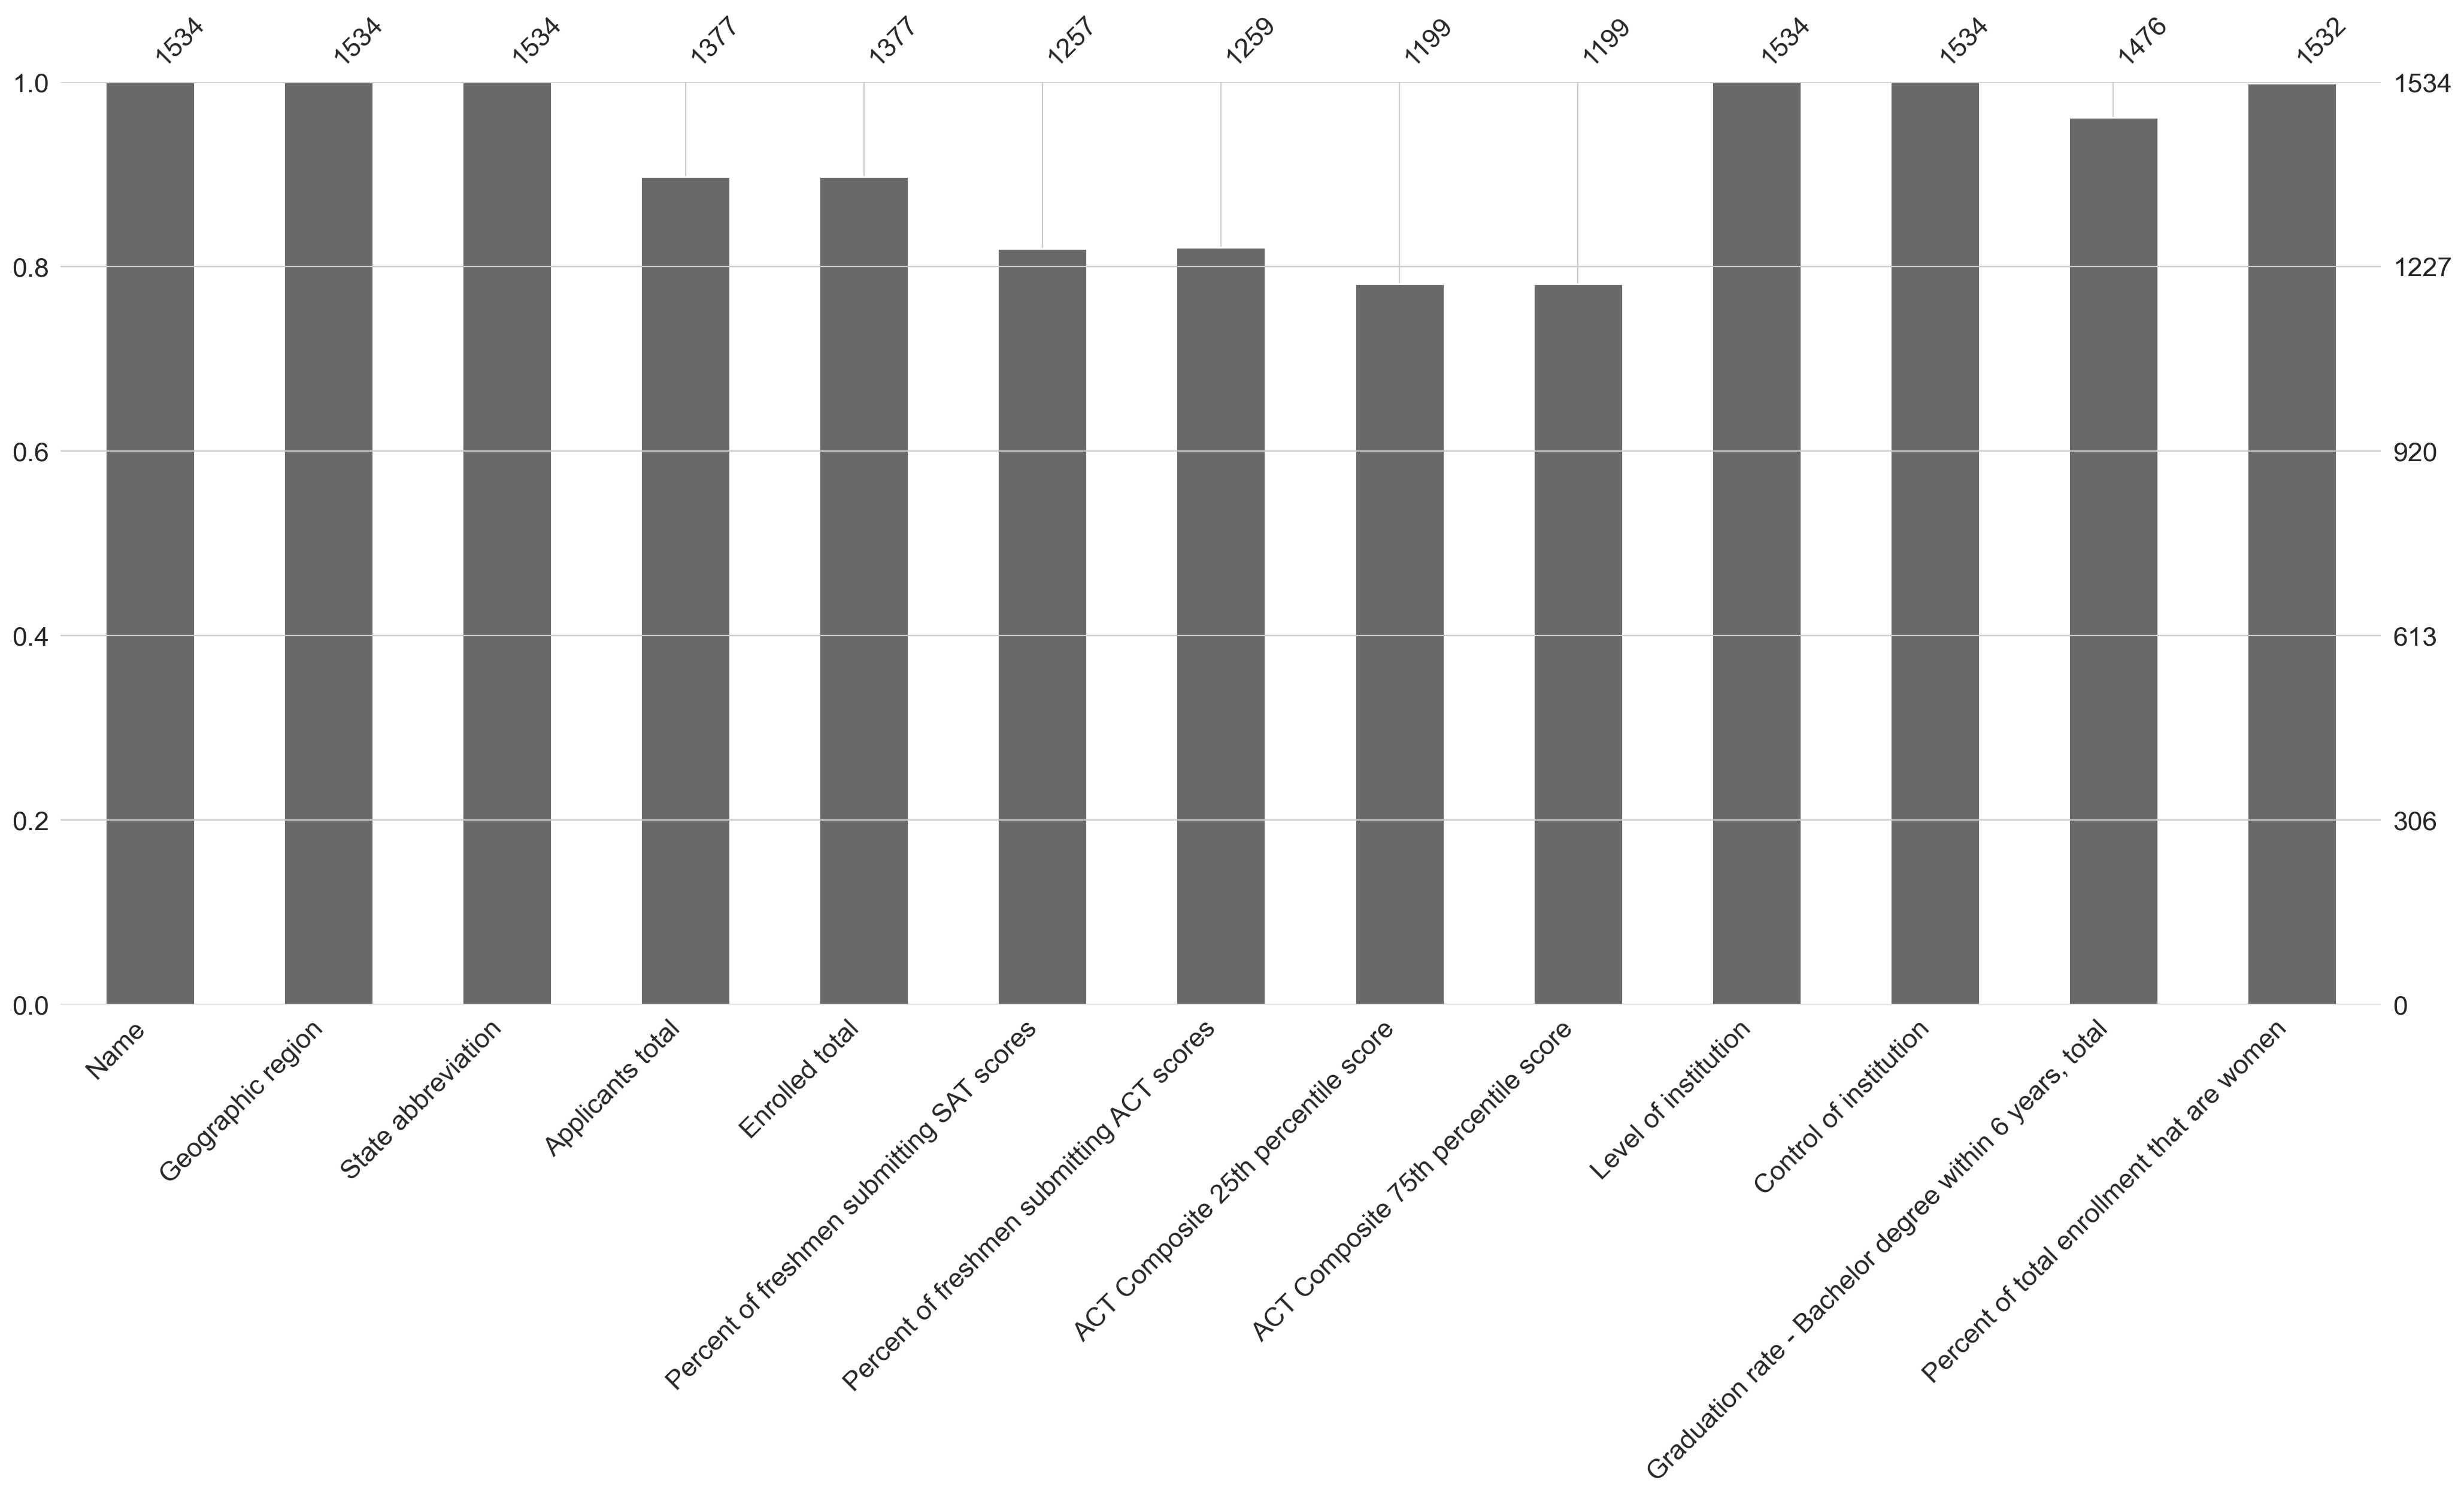

Name                                                         0
Geographic region                                            0
State abbreviation                                           0
Applicants total                                           157
Enrolled total                                             157
Percent of freshmen submitting SAT scores                  277
Percent of freshmen submitting ACT scores                  275
ACT Composite 25th percentile score                        335
ACT Composite 75th percentile score                        335
Level of institution                                         0
Control of institution                                       0
Graduation rate - Bachelor degree within 6 years, total     58
Percent of total enrollment that are women                   2
dtype: int64

In [44]:
# Bar plot of the missing values using missingno library
msno.bar(df)
plt.show()

# Counting missing values
df.isna().sum()

## 3.3 How did the dataset change after we removed missing values?

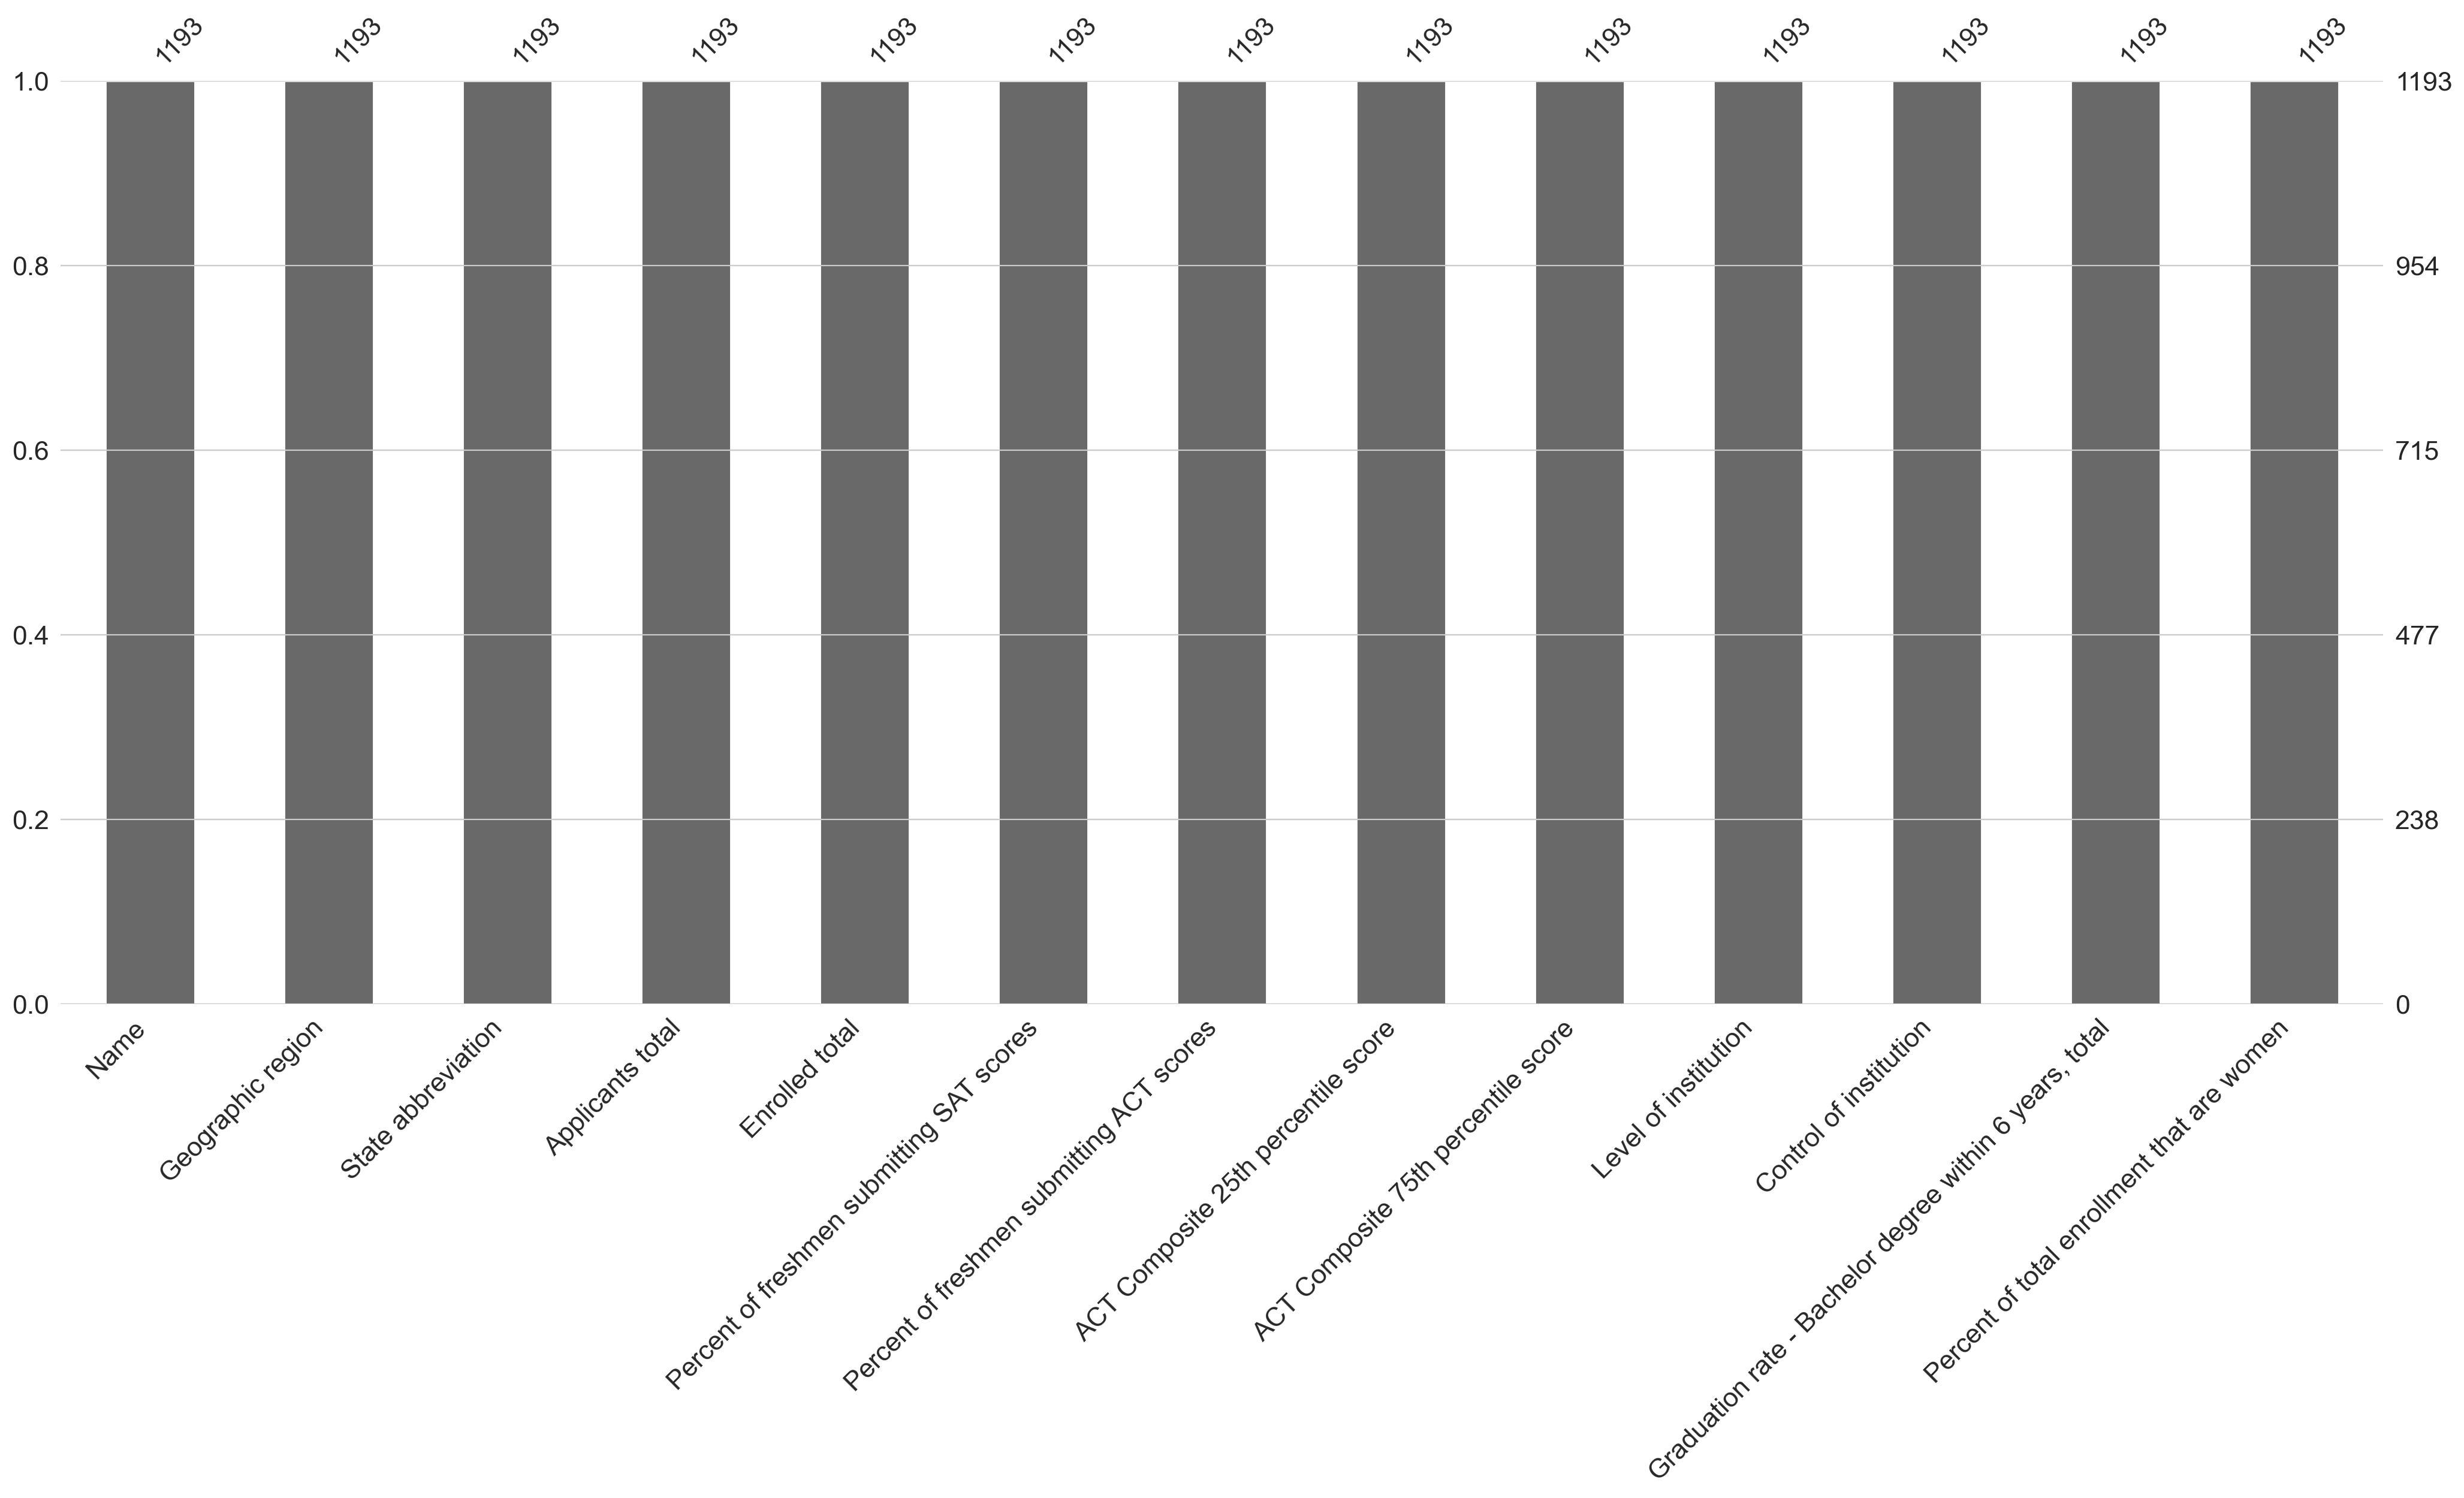

Name                                                       0
Geographic region                                          0
State abbreviation                                         0
Applicants total                                           0
Enrolled total                                             0
Percent of freshmen submitting SAT scores                  0
Percent of freshmen submitting ACT scores                  0
ACT Composite 25th percentile score                        0
ACT Composite 75th percentile score                        0
Level of institution                                       0
Control of institution                                     0
Graduation rate - Bachelor degree within 6 years, total    0
Percent of total enrollment that are women                 0
dtype: int64

In [45]:
# Drop  missing values for now
df = df.dropna()
# Bar plot of the missing values using missingno library
msno.bar(df)
plt.show()

# Counting missing values
df.isna().sum()

## 3.4

In [46]:
# Show the first 5 rows of the df_airports
display(df.head(50))
# Print a concise summary of a DataFrame.
display(df.info())

,Name,Geographic region,State abbreviation,Applicants total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,ACT Composite 25th percentile score,ACT Composite 75th percentile score,Level of institution,Control of institution,"Graduation rate - Bachelor degree within 6 years, total",Percent of total enrollment that are women
0,Alabama A & M University,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Alabama,6142.0,1104.0,15.0,88.0,15.0,19.0,Four or more years,Public,29.0,55.0
1,University of Alabama at Birmingham,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Alabama,5689.0,1773.0,6.0,93.0,22.0,28.0,Four or more years,Public,53.0,61.0
3,University of Alabama in Huntsville,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Alabama,2054.0,651.0,34.0,94.0,23.0,29.0,Four or more years,Public,48.0,44.0
4,Alabama State University,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Alabama,10245.0,1479.0,18.0,87.0,15.0,19.0,Four or more years,Public,25.0,61.0
5,The University of Alabama,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Alabama,30975.0,6454.0,23.0,76.0,22.0,30.0,Four or more years,Public,67.0,55.0
7,Auburn University at Montgomery,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Alabama,1958.0,579.0,0.0,54.0,18.0,23.0,Four or more years,Public,27.0,63.0
8,Auburn University,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Alabama,15745.0,3726.0,17.0,83.0,24.0,30.0,Four or more years,Public,68.0,49.0
9,Birmingham Southern College,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Alabama,1931.0,356.0,32.0,82.0,23.0,29.0,Four or more years,Private not-for-profit,62.0,46.0
12,Huntingdon College,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Alabama,1470.0,261.0,16.0,93.0,19.0,24.0,Four or more years,Private not-for-profit,43.0,50.0
13,Jacksonville State University,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Alabama,3083.0,1158.0,18.0,89.0,19.0,26.0,Four or more years,Public,31.0,58.0


<class 'pandas.core.frame.DataFrame'>
Index: 1193 entries, 0 to 1530
Data columns (total 13 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Name                                                     1193 non-null   object 
 1   Geographic region                                        1193 non-null   object 
 2   State abbreviation                                       1193 non-null   object 
 3   Applicants total                                         1193 non-null   float64
 4   Enrolled total                                           1193 non-null   float64
 5   Percent of freshmen submitting SAT scores                1193 non-null   float64
 6   Percent of freshmen submitting ACT scores                1193 non-null   float64
 7   ACT Composite 25th percentile score                      1193 non-null   float64
 8   ACT Composite 75th percentile sco

None

### 3.5 Explore columns

In [47]:
#Count Unique Values in each column
df.nunique()

Name                                                       1183
Geographic region                                             8
State abbreviation                                           51
Applicants total                                           1128
Enrolled total                                              869
Percent of freshmen submitting SAT scores                   101
Percent of freshmen submitting ACT scores                   100
ACT Composite 25th percentile score                          21
ACT Composite 75th percentile score                          21
Level of institution                                          1
Control of institution                                        2
Graduation rate - Bachelor degree within 6 years, total      88
Percent of total enrollment that are women                   80
dtype: int64

## 3.6

In [48]:
display(df['Name'].nunique())
display(df['Name'].unique())
display(df['Name'].value_counts())

1183

array(['Alabama A & M University', 'University of Alabama at Birmingham',
       'University of Alabama in Huntsville', ..., 'Ave Maria University',
       'University of South Florida-St Petersburg',
       'The Kingâ€™s College'], dtype=object)

Name
Westminster College                           3
Union College                                 3
Marian University                             2
Aquinas College                               2
Bethany College                               2
                                             ..
Southern University and A & M College         1
Southeastern Louisiana University             1
Northwestern State University of Louisiana    1
University of Louisiana at Monroe             1
The Kingâ€™s College                          1
Name: count, Length: 1183, dtype: int64

## 3.7

In [49]:
display(df['Geographic region'].nunique())
display(df['Geographic region'].unique())
display(df['Geographic region'].value_counts())

8

array(['Southeast AL AR FL GA KY LA MS NC SC TN VA WV',
       'Far West AK CA HI NV OR WA', 'Southwest AZ NM OK TX',
       'Rocky Mountains CO ID MT UT WY', 'New England CT ME MA NH RI VT',
       'Mid East DE DC MD NJ NY PA', 'Great Lakes IL IN MI OH WI',
       'Plains IA KS MN MO NE ND SD'], dtype=object)

Geographic region
Southeast AL AR FL GA KY LA MS NC SC TN VA WV    330
Mid East DE DC MD NJ NY PA                       211
Great Lakes IL IN MI OH WI                       195
Plains IA KS MN MO NE ND SD                      136
Far West AK CA HI NV OR WA                       112
Southwest AZ NM OK TX                             89
New England CT ME MA NH RI VT                     87
Rocky Mountains CO ID MT UT WY                    33
Name: count, dtype: int64

## 3.8

In [50]:
display(df['State abbreviation'].nunique())
display(df['State abbreviation'].unique())
display(df['State abbreviation'].value_counts())

51

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

State abbreviation
Pennsylvania      97
New York          76
California        74
Texas             60
North Carolina    45
                  ..
New Mexico         4
Delaware           3
Nevada             2
Alaska             1
Wyoming            1
Name: count, Length: 51, dtype: int64

## 3.9

In [51]:
display(df['Control of institution'].nunique())
display(df['Control of institution'].unique())
display(df['Control of institution'].value_counts())

2

array(['Public', 'Private not-for-profit'], dtype=object)

Control of institution
Private not-for-profit    737
Public                    456
Name: count, dtype: int64

### 3.10 Reflection 
> After doing a brief exploratory Data Analysis, what can we learn about the number of unique schools each region and state has? What about the number of public vs private? Are you suprised by the results? Enter your thoughts to the right of the # in the cell below


In [52]:
#

## 3.11 Numerical variables and correlation

In [53]:
# Provide a listing of all of the field names in the dataframe
df.columns

Index(['Name', 'Geographic region', 'State abbreviation', 'Applicants total',
       'Enrolled total', 'Percent of freshmen submitting SAT scores',
       'Percent of freshmen submitting ACT scores',
       'ACT Composite 25th percentile score',
       'ACT Composite 75th percentile score', 'Level of institution',
       'Control of institution',
       'Graduation rate - Bachelor degree within 6 years, total',
       'Percent of total enrollment that are women'],
      dtype='object')

## 3.12

In [54]:
df_numerical = df[['Applicants total',
       'Enrolled total', 'Percent of freshmen submitting SAT scores', 'ACT Composite 25th percentile score','ACT Composite 75th percentile score',
       'Percent of freshmen submitting ACT scores',
       'Graduation rate - Bachelor degree within 6 years, total',
       'Percent of total enrollment that are women']]

## 3.13 How would we show the relationship between all of the numeric variables?

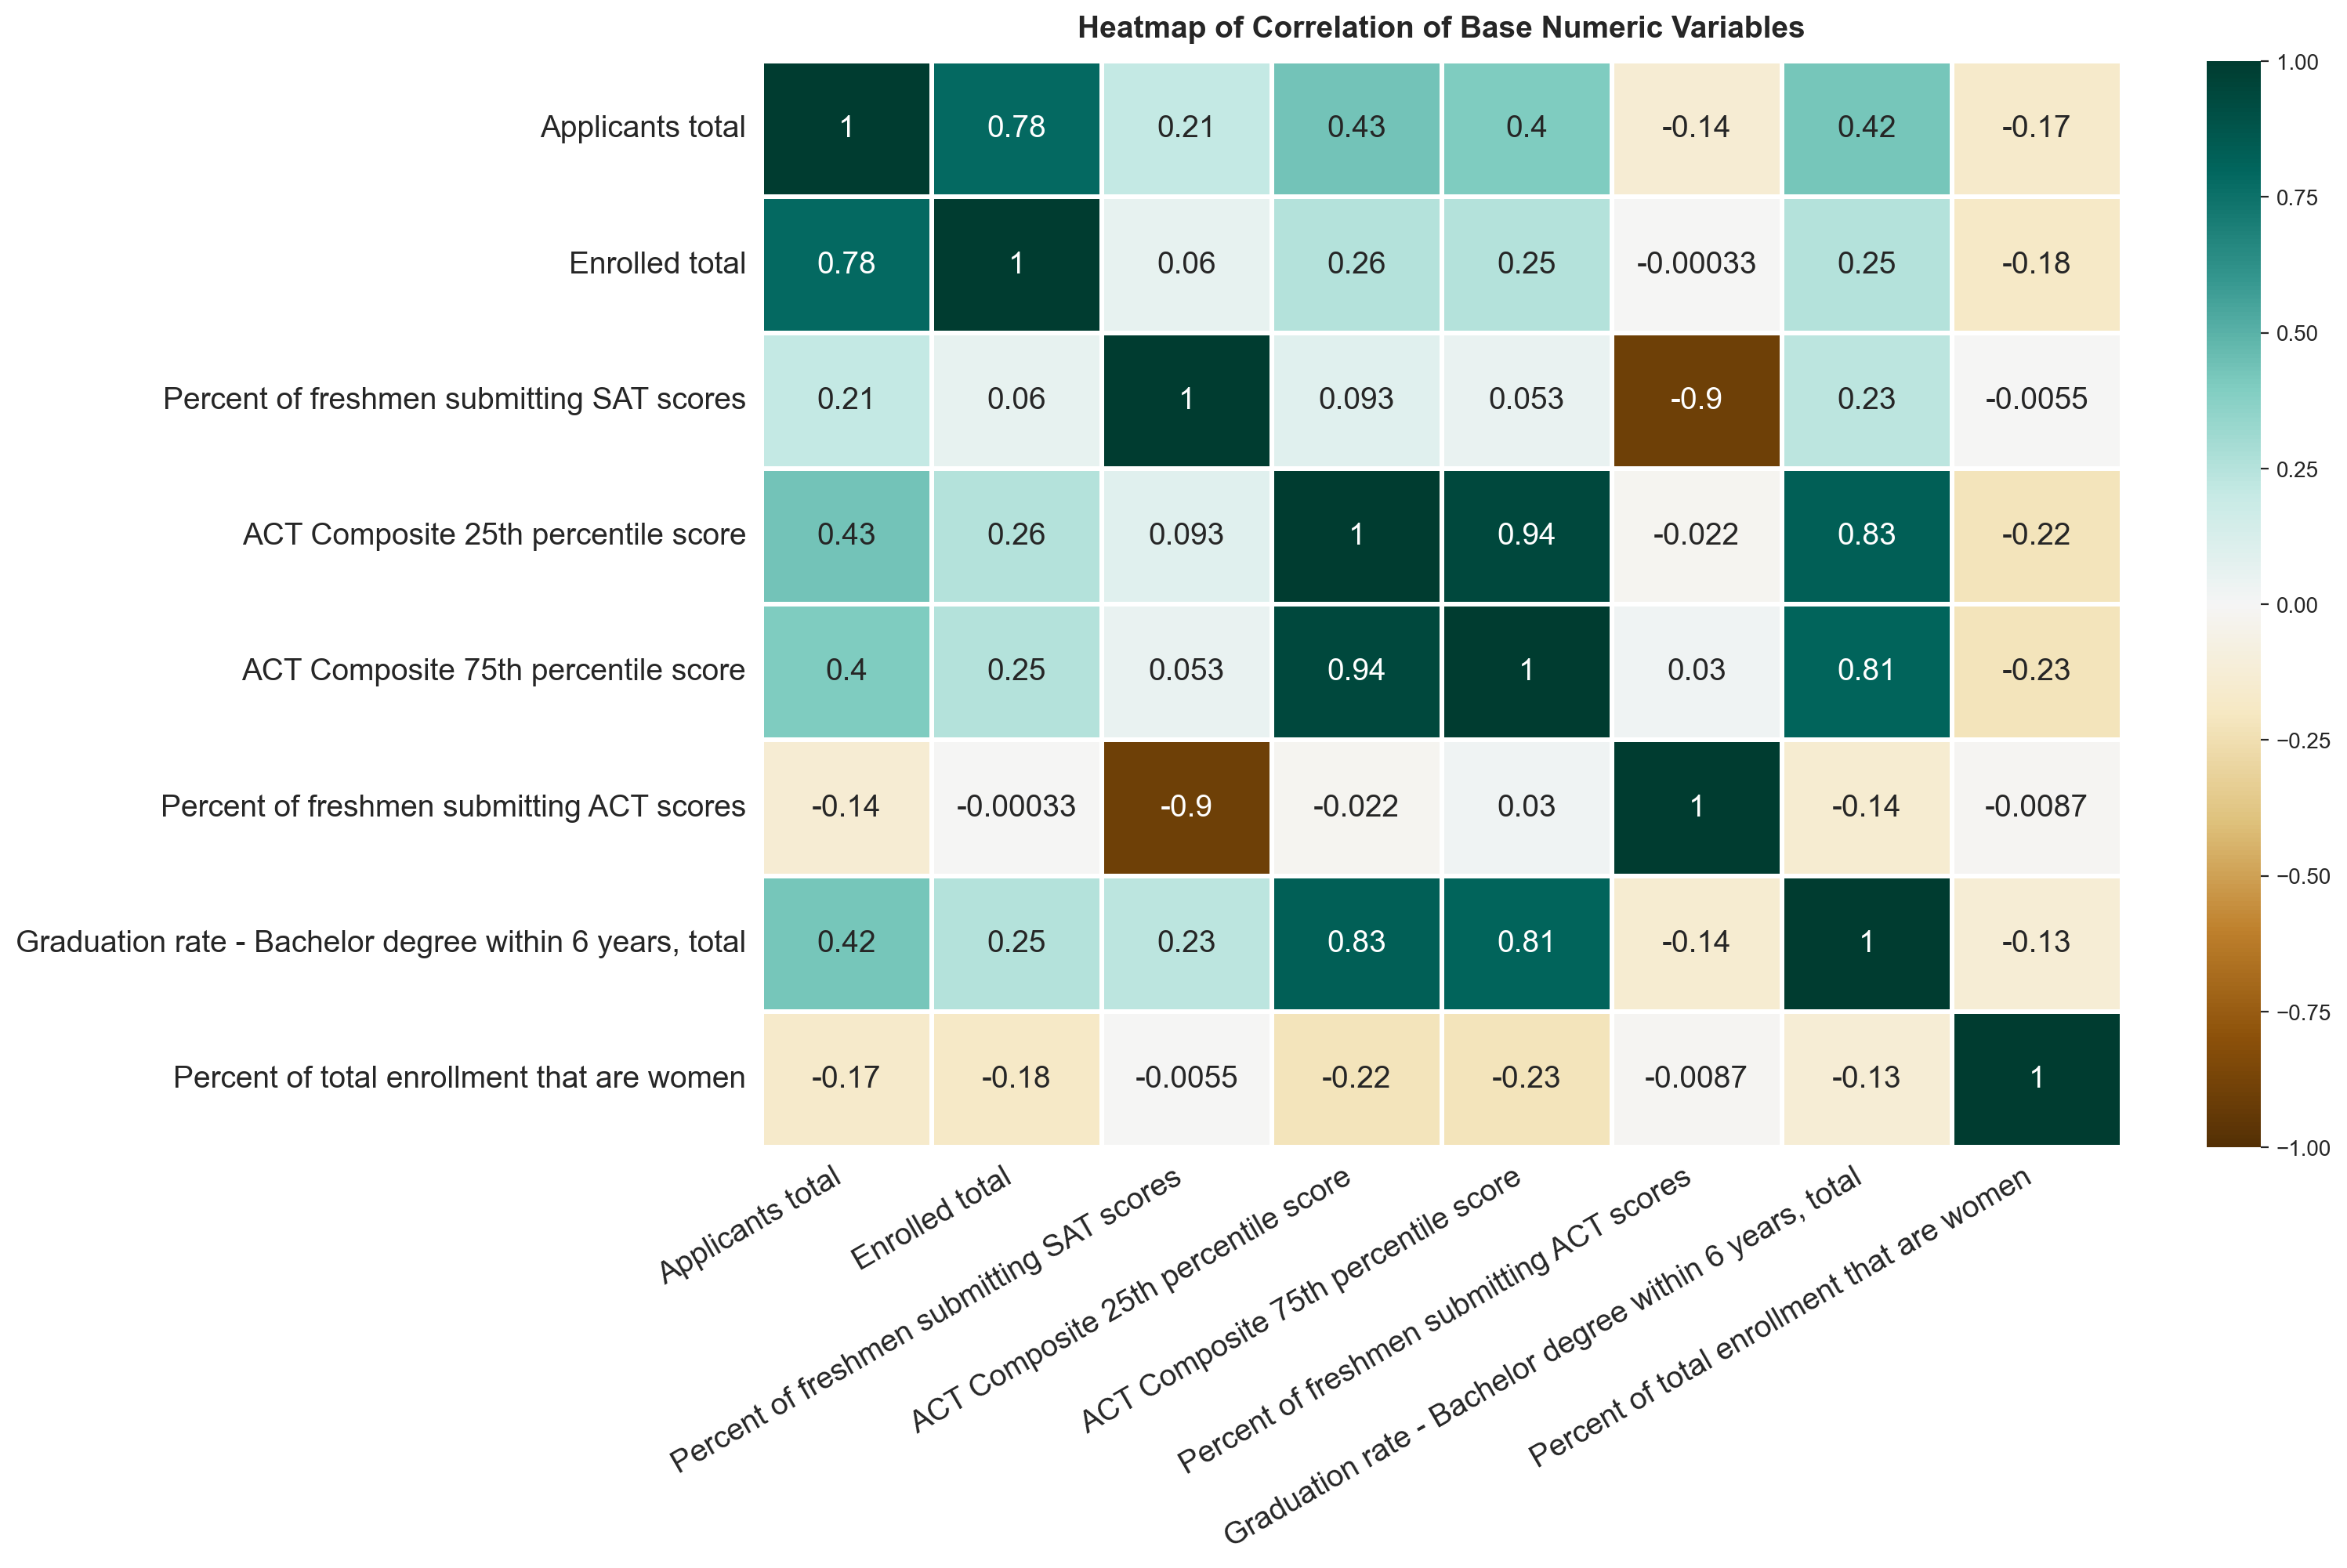

In [55]:
# Create and show correlation matrix with heatmap among core variables
plt.figure(figsize=(14,9))

sns.heatmap(df_numerical.astype(float).corr(), linewidths=2, vmax=1.0, vmin=-1.0, annot_kws={"fontsize":14},
            cmap='BrBG', linecolor='white', annot=True)

plt.xticks(rotation=30, ha='right', fontsize='14')
plt.yticks( fontsize='14')

plt.title('Heatmap of Correlation of Base Numeric Variables', fontweight='bold', 
          fontsize='14', ha='center', y=1.01)

plt.show()

### 3.14 Reflection 
> After looking at this correlation matrix, what are some highly correlated pairs? What are some highly negatively correlated pairs? Why is the top left to bottom right diagonal all have coefficients of +1.0? Use inference to contruct a logical statment and put your answer to the right of the # in the cell block below

In [56]:
#

## 3.13 How would we ADD a column of state codes (AL for Alabama, etc.) using state names?

In [57]:
# All USA State Abbreviations as a Map

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

# Invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

# Copy the matching result into new df (state_code)
State_code = df['State abbreviation'].replace(us_state_to_abbrev, regex=True)
# Insert that as a new coulmn as location 3 nexet to state names column
df.insert(loc=3, column='State_code', value=State_code)

df.head()

,Name,Geographic region,State abbreviation,State_code,Applicants total,Enrolled total,Percent of freshmen submitting SAT scores,Percent of freshmen submitting ACT scores,ACT Composite 25th percentile score,ACT Composite 75th percentile score,Level of institution,Control of institution,"Graduation rate - Bachelor degree within 6 years, total",Percent of total enrollment that are women
0,Alabama A & M University,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Alabama,AL,6142.0,1104.0,15.0,88.0,15.0,19.0,Four or more years,Public,29.0,55.0
1,University of Alabama at Birmingham,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Alabama,AL,5689.0,1773.0,6.0,93.0,22.0,28.0,Four or more years,Public,53.0,61.0
3,University of Alabama in Huntsville,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Alabama,AL,2054.0,651.0,34.0,94.0,23.0,29.0,Four or more years,Public,48.0,44.0
4,Alabama State University,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Alabama,AL,10245.0,1479.0,18.0,87.0,15.0,19.0,Four or more years,Public,25.0,61.0
5,The University of Alabama,Southeast AL AR FL GA KY LA MS NC SC TN VA WV,Alabama,AL,30975.0,6454.0,23.0,76.0,22.0,30.0,Four or more years,Public,67.0,55.0


# 4. Data Visualization and storytelling 

## 4.1 Enrollment  Analysis

In [58]:
data = [['Applicants', df["Applicants total"].mean()], ['Enrolled', df["Enrolled total"].mean() ]]
df_pie = pd.DataFrame(data, columns=['Admission', 'Mean'])

df_pie['Mean'] =df_pie['Mean'].round(decimals = 2)
df_pie


,Admission,Mean
0,Applicants,6655.62
1,Enrolled,1095.43


In [59]:
Enrolled_df = df.groupby(by=["Control of institution"])[["Enrolled total"]].sum().reset_index()

Enrolled_df

,Control of institution,Enrolled total
0,Private not-for-profit,412817.0
1,Public,894034.0


In [60]:
# Create subplots: use 'domain' type for Pie subplot
color_palette1=['#0c2c84', '#1d91c0']

# Set up the subplots grid
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# Add the Enrollment Rate trace Pie chart
fig.add_trace(go.Pie(labels=df_pie['Admission'],
                     values=df_pie['Mean'], textinfo='label+percent' ,name="Admission",
                     marker_colors=color_palette1,
                     pull=[0, 0.2]),1, 1)

# Add the Enrollment (Public Vs. Private) trace Donut chart
fig.add_trace(go.Pie(labels=Enrolled_df['Control of institution'],name="Enrollment",
                     values=Enrolled_df['Enrolled total'], textinfo='label+percent',
                    marker_colors=color_palette1,
                    hole=.5 ),1, 2)

fig.update_traces(hoverinfo="label+percent+name")

# Add a titles (and show)
fig.update_layout(
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Enrollment Rate', x=0.1, y=1.1, font_size=20, showarrow=True),
                 dict(text='Enrollment<br>Public Vs. Private', x=0.82, y=1.1, font_size=20, showarrow=True)])

fig.show()



## 4.1 Number of colleges in every state (Public & Private) Analysis 

In [61]:
# Use count().reset_index() method
State_count = df.groupby(['State abbreviation', 'Control of institution']).size().reset_index(name='Counts')

Total= State_count.groupby(['State abbreviation'])['Counts'].sum().reset_index(name='Total count')

State_count = State_count.merge(Total, left_on='State abbreviation', right_on='State abbreviation')


State_count.head()

,State abbreviation,Control of institution,Counts,Total count
0,Alabama,Private not-for-profit,9,22
1,Alabama,Public,13,22
2,Alaska,Private not-for-profit,1,1
3,Arizona,Private not-for-profit,3,6
4,Arizona,Public,3,6


## 4.2 How do we show the counts of public and private colleges for each U.S. state?

In [62]:

pio.templates.default = "plotly_white"
#pio.templates.default = "none"

# Create the bar chart
fig = px.bar(
             # Set the data
             State_count,
             # Set the orientation to horizontal
             orientation="h",
             # Set the variable for the y-axis
             y="State abbreviation",
             # Set the variable for the x-axis
             x="Counts",
             # Set the color variable and map
             color="Control of institution",
             # color_continuous_scale='burg',
             color_discrete_sequence=['#0c2c84', '#1d91c0'],
             width=1100, height=1200,
             # To show total on Hover text
            text=State_count['Total count']
            )


fig.update_traces(hovertemplate='<b>%{y}</b><br><br>Count: %{x}'+ '<br>Total: %{text}')

# Update the figure layout
fig.update_layout(yaxis={'categoryorder':'total ascending'},uniformtext_minsize=40, uniformtext_mode='hide',
                 # Add title
                 title_text = 'Colleges Counts in every state<br>(Click legend to toggle traces)',
                 title_x=0.5)


# Show the plot
fig.show()

### 4.3 Reflection 
> After visualizing the public vs private value counts by state, what were you able to deduce from the data? Were you suprised by the results? Enter your thoughts in the cell below to the right of the #

In [63]:
#

## 4.4 How does the total number of applicants compare to the total number of enrolled?

In [64]:
# Set up the color map
color_map = {'Private not-for-profit': '#0c2c84', 'Public': '#41b6c4'}

# Create a scatterplot
fig = px.scatter(df,
    x='Applicants total',
    y='Enrolled total',
    # Set the colors to use your color map
    color='Control of institution',
    color_discrete_map=color_map,
    size='Enrolled total',
    trendline="ols"
)


fig.update_layout(# Add title
                 title_text = 'Scatterplot of Applicants total and Enrolled total<br>(Click legend to toggle traces)',
                 title_x=0.5)





# Show your work
fig.show()

### 4.5 Reflection 
> Based on this scatterplot, What can we tell about the number of total applicants vs the number of enrolled students? What scenarios do you think cause someone to apply but not attend? Enter your thoughts in the cell below to the right of the #.

In [65]:
#

## 4.6 How does the choropleth map display the enrolled total variation differently than the scatterplot above this section? <br> 
> Choropleth map is a type of statistical thematic map that uses intensity of color to correspond with an aggregate summary of a geographic characteristic (Enrolled total) 

#### 4.7 Group by states with an aggregate summary (Applicants total and enrolled total)

In [66]:
applicants_state = df.groupby(['State abbreviation','State_code' ])[['Applicants total','Enrolled total']].sum()
applicants_state = applicants_state.sort_values(by='Applicants total', ascending=False).reset_index()
display(applicants_state.head())

,State abbreviation,State_code,Applicants total,Enrolled total
0,California,CA,1174539.0,119577.0
1,New York,NY,723922.0,76760.0
2,Pennsylvania,PA,499362.0,78415.0
3,Texas,TX,440676.0,92926.0
4,Massachusetts,MA,394835.0,41408.0


In [67]:

fig = px.choropleth(applicants_state,
                    locations='State_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Enrolled total',
                    color_continuous_scale=["#ffffcc" ,"#c7e9b4", "#7fcdbb", "#41b6c4", "#1d91c0","#225ea8","#0c2c84"], 
                    width=1200, height=600

                    )
fig.update_layout(
      title_text = 'Enrolled total by State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )

fig.show()

### 4.8 Applicants total Vs. Enrolled total Stacked Barplot (By States)

In [68]:
# Groupby Airlines by State
States_df = df.groupby(['State abbreviation','State_code'])[['Applicants total','Enrolled total']].sum()
States_df=States_df.sort_values("Applicants total", ).reset_index()
States_df

,State abbreviation,State_code,Applicants total,Enrolled total
0,Alaska,AK,494.0,33.0
1,Wyoming,WY,4181.0,1584.0
2,North Dakota,ND,14970.0,6362.0
3,Nevada,NV,15200.0,6767.0
4,South Dakota,SD,15352.0,6015.0
...,...,...,...,...
46,Massachusetts,MA,394835.0,41408.0
47,Texas,TX,440676.0,92926.0
48,Pennsylvania,PA,499362.0,78415.0
49,New York,NY,723922.0,76760.0


### 4.9 How do we see the total applicants vs. total enrolled for States?

In [69]:
# Create the bar chart
fig = go.Figure(data=[
    # Add the Applicants trace to the bar chart
    go.Bar(name='Applicants', x=States_df['Applicants total'], y=States_df['State abbreviation'],
           orientation="h", marker_color='#1d91c0'),
    # Add the Enrolled trace to the bar chart (overlay)
    go.Bar(name='Enrolled', x=States_df['Enrolled total'], y=States_df['State abbreviation'],
           orientation="h", marker_color='#0c2c84')
])

# Change the bar mode
fig.update_layout(barmode='overlay', width=1500, height=1500,
                 # Add title
                  title="Applicants total Vs. Enrolled total (by State) <br>(Click legend to toggle traces) ",title_x=0.5)

# Show your work
fig.show()

### 4.10 Reflection Applicants vs enrolled High States
> What do you think makes these states so popular for applicants? What can you tell about the number of people who apply vs the number who actually end up attending? How would we view the top 10? Top 5?

In [70]:
#

### 4.12 Reflection - Applicants total vs enrolled(low) 
> Why do you think so few people apply and attend some of the schools in these states? How would we view the bottom 10? The bottom 5? Type your answer to the right of the # in the cell below


In [71]:
#

## 4.13 Percent of total enrollment by Gender

In [72]:
df['Percent of total enrollment that are men'] = 100 - df['Percent of total enrollment that are women']
df_State_gender = df.groupby(['State abbreviation'])[['Percent of total enrollment that are men', 'Percent of total enrollment that are women']].mean().reset_index()
df_State_gender.head()


,State abbreviation,Percent of total enrollment that are men,Percent of total enrollment that are women
0,Alabama,40.181818,59.818182
1,Alaska,35.000000,65.000000
2,Arizona,51.666667,48.333333
3,Arkansas,44.000000,56.000000
4,California,42.527027,57.472973


## 4.14 How do we see the Male-to-Female ratio of total enrollment in each state?

In [73]:
# Create the bar chart
fig = go.Figure(data=[
    # Add the Applicants trace to the bar chart
    go.Bar(name='Men', x=df_State_gender['Percent of total enrollment that are men'], y=df_State_gender['State abbreviation'],
           orientation="h", marker_color='#1f78b4',
           text=df_State_gender['Percent of total enrollment that are men'],
          texttemplate = "%{x:.0f}%"),
    # Add the Enrolled trace to the bar chart (overlay)
    go.Bar(name='Women', x=df_State_gender['Percent of total enrollment that are women'], y=df_State_gender['State abbreviation'],
           orientation="h", marker_color='#a6cee3',
           text=df_State_gender['Percent of total enrollment that are women'],
          texttemplate = "%{x:.0f}%")
])

# Change the bar mode
fig.update_layout(barmode='relative', width=1500, height=1500, 
                 # Add title
                  title="Applicants total Vs. Enrolled total (by State) <br>(Click legend to toggle traces) ",title_x=0.5)

# Show your work
fig.show()

### 4.15 Reflection - gender analysis
> In this graph we analyzed gender ratios by state. What states have the most evenly distributed populations of students? What states have the highest percents of males vs females and vice versa? Which states have more men than females? Why do you think this is? Type your answer to the right of the # in the cell below.

## 4.28 What does the distribution look like for private or public colleges when comparing Total Student Enrollment vs. Graduation Rate?

In [74]:
# Set up the color map
color_map = {'Private not-for-profit': '#0c2c84', 'Public': '#41b6c4'}

# Create a scatterplot
fig = px.scatter(df,
    x='Enrolled total',
    y='Graduation rate - Bachelor degree within 6 years, total',
    # Set the colors to use your color map
    color='Control of institution',
    color_discrete_map=color_map,
    #size='Enrolled total',
   # trendline="ols"
)


fig.update_layout(# Add title
                 title_text = 'Enrolled Vs. Graduation rate<br>(Click legend to toggle traces)',
                 title_x=0.5)



# Show your work
fig.show()

### 4.29 Reflection 
> When comparing the 6 year graduation rates against the number of enrolled students, what inferences are we able to make? Do smaller or bigger schools have higher graduation rates? What kind of impact does the size of a school have on graduation based on this graph? Could there be other variables not graphed to better explain this problem? Type your answer to the right of the # in the cell below.


### 4.30 Group by colleges and States with an aggregate summary of Graduation rate


## 4.30

In [75]:
Graduation_rate_Total= df.groupby(['State abbreviation'])\
[['Graduation rate - Bachelor degree within 6 years, total']].mean().reset_index()


Graduation_rate_Total

,State abbreviation,"Graduation rate - Bachelor degree within 6 years, total"
0,Alabama,43.227273
1,Alaska,40.000000
2,Arizona,52.166667
3,Arkansas,43.588235
4,California,62.729730
...,...,...
46,Virginia,57.435897
47,Washington,63.823529
48,West Virginia,39.235294
49,Wisconsin,55.718750


In [76]:
State_grad_rate = df.groupby(['State abbreviation', 'State_code','Control of institution'])\
[['Graduation rate - Bachelor degree within 6 years, total']].mean().reset_index()



#State_grad_rate = State_grad_rate.merge(Graduation_rate_Total, left_on='State abbreviation', right_on='State abbreviation')


State_grad_rate

,State abbreviation,State_code,Control of institution,"Graduation rate - Bachelor degree within 6 years, total"
0,Alabama,AL,Private not-for-profit,47.444444
1,Alabama,AL,Public,40.307692
2,Alaska,AK,Private not-for-profit,40.000000
3,Arizona,AZ,Private not-for-profit,48.000000
4,Arizona,AZ,Public,56.333333
...,...,...,...,...
92,West Virginia,West VA,Private not-for-profit,47.285714
93,West Virginia,West VA,Public,33.600000
94,Wisconsin,WI,Private not-for-profit,56.894737
95,Wisconsin,WI,Public,54.000000


## 4.31

## 4.32

###  4.33 How would using a choropleth map best represent the graduation rate variation in every state? <br> 
> Choropleth map is a type of statistical thematic map that uses intensity of color to correspond with an aggregate summary of a geographic characteristic (Graduation rate) 

In [77]:
fig = px.choropleth(State_grad_rate,
                    locations='State_code', 
                    locationmode="USA-states", 
                    scope="usa",
                    color='Graduation rate - Bachelor degree within 6 years, total',
                    color_continuous_scale=["#ffffcc" ,"#c7e9b4", "#7fcdbb", "#41b6c4", "#1d91c0","#225ea8","#0c2c84"], 
                    width=1400, height=600

                    )
fig.update_layout(
      title_text = 'Graduation rate by State',
      title_font_family="Times New Roman",
      title_font_size = 22,
      title_font_color="black", 
      title_x=0.45, 
         )

fig.show()

In [78]:
#

## 4.34 How do we view mean graduation rate for public and private colleges in each state?

In [79]:
pio.templates.default = "plotly_white"
#pio.templates.default = "none"

# Create the bar chart
fig = px.bar(
             # Set the data
             State_grad_rate,
             # Set the orientation to horizontal
             orientation="h",
             # Set the variable for the y-axis
             y="State abbreviation",
             # Set the variable for the x-axis
             x="Graduation rate - Bachelor degree within 6 years, total",
             # Set the color variable and map
             color="Control of institution",
             # color_continuous_scale='burg',
             color_discrete_sequence=['#0c2c84', '#1d91c0'],
             width=1100, height=1200,
            )



# Update the figure layout
fig.update_layout(yaxis={'categoryorder':'total ascending'},
                 # Add title
                 title_text = 'Graduation rate mean in each States (public or private separation)<br>(Click legend to toggle traces)',
                 title_x=0.5)


# Show the plot
fig.show()

### 4.35 Reflection 
> These graphs allowed us to filter the data both numerically and visually, filtering the graduation rates by Private/Public by State. Do northern or southern states have the highest rates? What do you think are some of the reasons behind this? Do any specific types of schools come to mind? Are they public or private? Did public or private genrally have higher graduation rates? Did any states go against this general trend?


# Goodbye for now!
<p>This was just a short introduction data science project using python with College Admissions dataset I hope you enjoyed it! :)</p>